# Customer Purchase Behavior Analysis using Descriptive Statistics

# GitHub Link:

https://github.com/Bpritee/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics.git

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [9]:
# # Importing required libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
import scipy.stats as stats

In [10]:
from google.colab import drive
# Load Dataset

# Sample Dataset(link) : https://drive.google.com/file/d/1LqUWXWzBotFbhIqxOFqkZENaeu5JOeJ4/view?usp=sharing
# mounting your drive, so that you can access the files there
# you'll receive a authentication prompt. Complete it.

#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/module-5-statistics/Assignment/Superstore_Marketing_Data.csv'
#smdata = pd.read_csv(path)

smdata=pd.read_csv("/content/Superstore Marketing Data - Sheet1.csv")
smdata

Mounted at /content/drive


In [11]:
# Dataset First Look of Five rows and all the columns
smdata.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [12]:
# Dataset Rows & Columns count
smdata.shape

(2240, 22)

In [13]:
# Dataset Info
smdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
# Dataset Duplicate Value Count
len(smdata[smdata.duplicated()])

0

In [15]:
# Missing Values/Null Values Count
# Display how many null values from each column and return the sum
print(smdata.isna().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [16]:
#Dataset Coloumns
smdata.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [17]:
# Filling the null or empty values with zero
mean_income=smdata['Income'].mean()
smdata['Income'].fillna(mean_income,inplace=True)

In [81]:
#Printing the null values
print(smdata.isna().sum())

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
TotalSpend             0
dtype: int64


In [82]:
#Printing the cleaned data
print(f"Cleaned and Preprocessed Dataset:")
print(smdata.head())

#converting to .csv file of clean data
smdata.to_csv("cleaned_data.csv",index=False)

Cleaned and Preprocessed Dataset:
      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntSweetProducts  MntGoldProds  \
0   6/16/2014        0       189  ...               189           218   
1   6/15/2014        0       464  ...                 0            37   
2   5/13/2014        0       134  ...                 2            30   
3    ########        0        10  ...                 0             0   
4    ########        0         6  ...                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPur

In [20]:
# Dataset Describe
data_describe=smdata.describe()
data_describe

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


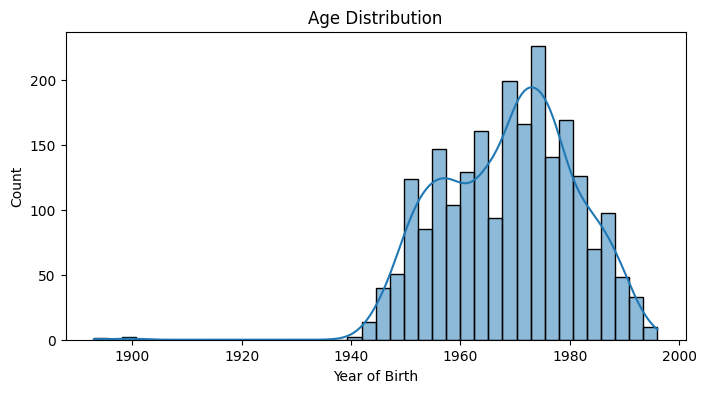

In [21]:
#showing distribution of age
plt.figure(figsize=(8,4))
sns.histplot(smdata['Year_Birth'],bins=40,kde=True)
plt.xlabel('Year of Birth')
plt.title('Age Distribution')
plt.show()

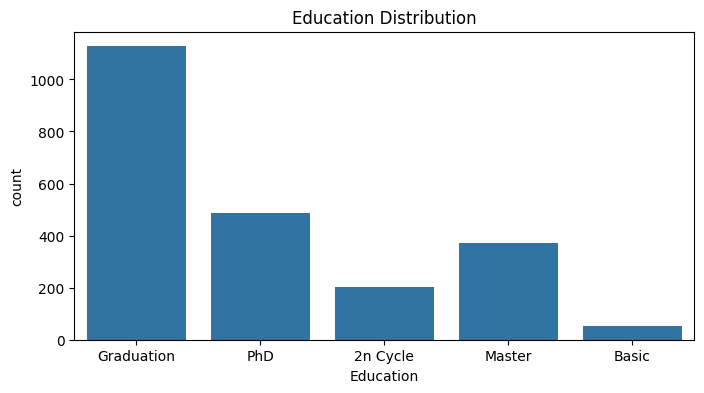

In [22]:
#showing distribution of education
plt.figure(figsize=(8,4))
sns.countplot(x='Education',data=smdata)
plt.title('Education Distribution')
plt.show()

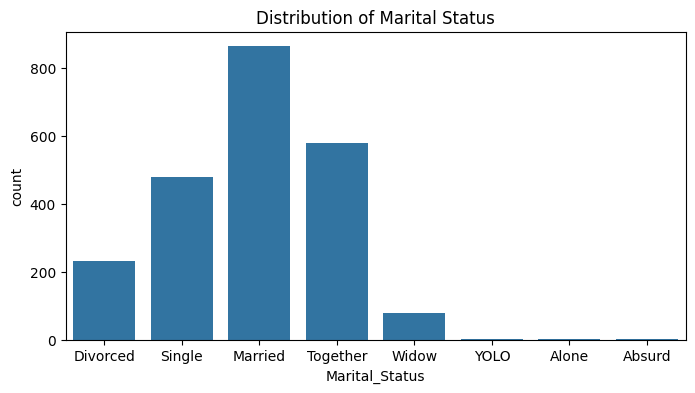

In [23]:
#showing distribution of Marital Status
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status',data=smdata)
plt.title('Distribution of Marital Status')
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

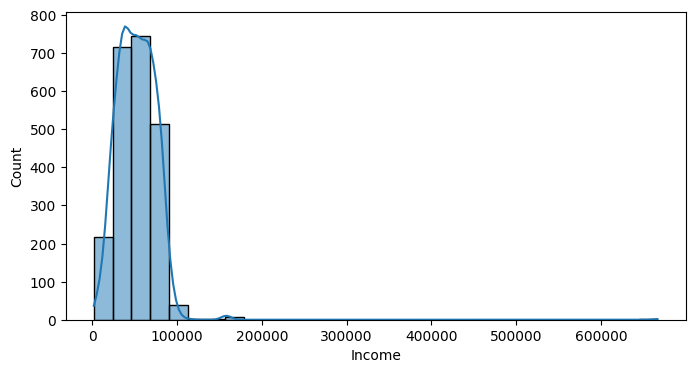

In [24]:
#showing distribution of income
plt.figure(figsize=(8,4))
sns.histplot(smdata['Income'],bins=30,kde=True)

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

###Calculating measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables.

In [25]:
# Lets first calculate measures of central tendency (mean, median, mode)
# Mean
key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
mean=smdata[key_variables].mean()
print(f"Mean of the selected key variables form dataset:\n{mean}")

Mean of the selected key variables form dataset:
Income               52247.251354
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
NumDealsPurchases        2.325000
NumWebPurchases          4.084821
NumStorePurchases        5.790179
NumWebVisitsMonth        5.316518
dtype: float64


In [26]:
# Median
key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
median=smdata[key_variables].median()
print(f"Median of the selected key variables form dataset:\n{median}")

Median of the selected key variables form dataset:
Income               51741.5
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumStorePurchases        5.0
NumWebVisitsMonth        6.0
dtype: float64


In [27]:
# Mode
key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
mode=smdata[key_variables].mode()
print(f"Mode of the selected key variables form dataset:{mode}")


Mode of the selected key variables form dataset:         Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0  52247.251354       56         2          0                7   

   MntFishProducts  NumDealsPurchases  NumWebPurchases  NumStorePurchases  \
0                0                  1                2                  3   

   NumWebVisitsMonth  
0                  7  


In [28]:
# Calcute the Measures of dispersion (variance, standard deviation) for key variables
# Variance

key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
Variance=smdata[key_variables].var()
print(f"Variance of the selected key variables form dataset:\n{Variance}")

Variance of the selected key variables form dataset:
Income               6.268913e+08
Recency              8.388237e+02
MntWines             1.132978e+05
MntFruits            1.581926e+03
MntMeatProducts      5.094743e+04
MntFishProducts      2.984325e+03
NumDealsPurchases    3.733542e+00
NumWebPurchases      7.721252e+00
NumStorePurchases    1.056873e+01
NumWebVisitsMonth    5.888606e+00
dtype: float64


In [29]:
# Standard deviation

key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
Standard_deviation=smdata[key_variables].std()
print(f"Variance of the selected key variables form dataset:\n{Standard_deviation}")

Variance of the selected key variables form dataset:
Income               25037.797168
Recency                 28.962453
MntWines               336.597393
MntFruits               39.773434
MntMeatProducts        225.715373
MntFishProducts         54.628979
NumDealsPurchases        1.932238
NumWebPurchases          2.778714
NumStorePurchases        3.250958
NumWebVisitsMonth        2.426645
dtype: float64


###Identify Outliers

In [30]:
key_variables=['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']

for variables in key_variables:
  fig = px.box(smdata[variables],orientation="h")
  fig.show()

We have determined that there are no outliers in the variables Recency and NumStorePurchases. Consequently, we have decided not to calculate outliers for these variables. As a result, we have removed them from consideration as key variables.

In [31]:
# Calculate the first quartile (Q1), median (Q2), third quartile (Q3), and interquartile range (IQR) of the 'key variables1' column
key_variables1=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
df_key_variables_Q1 = smdata[key_variables1].quantile(0.25)
df_key_variables_Q2 = smdata[key_variables1].quantile(0.5)
df_key_variables_Q3 = smdata[key_variables1].quantile(0.75)
IQR = df_key_variables_Q3 - df_key_variables_Q1

# Calculate the upper and lower fences for outlier detection
df_upperfence_key_variables = df_key_variables_Q3 + (1.5) * IQR
df_lowerfence_key_variables = df_key_variables_Q1 - (1.5) * IQR

# Display the calculated values
print(f"key_variables Q1 Value:\n{df_key_variables_Q1}""\n")
print(f"key_variables Q2 Value:\n{df_key_variables_Q2}""\n")
print(f"key_variables Q3 Value:\n{df_key_variables_Q3}""\n")
print(f"IQR:\n{IQR}""\n")
print(f"Upper Fence:\n{df_upperfence_key_variables}""\n")
print(f"Lower Fence:\n{df_lowerfence_key_variables}""\n")

key_variables Q1 Value:
Income               35538.75
MntWines                23.75
MntFruits                1.00
MntMeatProducts         16.00
MntFishProducts          3.00
NumDealsPurchases        1.00
NumWebPurchases          2.00
NumWebVisitsMonth        3.00
Name: 0.25, dtype: float64

key_variables Q2 Value:
Income               51741.5
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
Name: 0.5, dtype: float64

key_variables Q3 Value:
Income               68289.75
MntWines               504.25
MntFruits               33.00
MntMeatProducts        232.00
MntFishProducts         50.00
NumDealsPurchases        3.00
NumWebPurchases          6.00
NumWebVisitsMonth        7.00
Name: 0.75, dtype: float64

IQR:
Income               32751.0
MntWines               480.5
MntFruits               32.0
MntMeatProducts        216.0
MntFishProdu

In [32]:
# Initialize df_update
key_variables1=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
df_update = smdata.copy()

# Filter dataframe based on fences
for col in key_variables1:
    df_update = df_update[(df_update[col] >= df_lowerfence_key_variables[col]) & (df_update[col] <= df_upperfence_key_variables[col])]

df_update

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

#Normal Distribution

Calculate probabilities and expected values based on these Normal distributions.

In [33]:
#calculating the total purchases of mean
total_purchases = smdata[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
p_purchase = total_purchases.mean() / total_purchases.max()
expected_purchases = total_purchases.mean()

In [34]:
from scipy.stats import norm

#Probability Distributions and Expected values
mu_income, sigma_income = smdata['Income'].mean(), smdata['Income'].std()
prob_income_gt_70000 = 1 - norm.cdf(70000, mu_income, sigma_income)
expected_income = mu_income + sigma_income * norm.ppf(prob_income_gt_70000)

print("Probability Distributions and Calculated Values:")
print(f"Total Purchases:")
print(f"   Probability of a purchase: {p_purchase:.4f}")
print(f"   Expected number of purchases: {expected_purchases:.2f}")

print(f"\nIncome:")
print(f"   Probability of income > $70,000: {prob_income_gt_70000:.4f}")
print(f"   Expected income: {expected_income:.2f}")

Probability Distributions and Calculated Values:
Total Purchases:
   Probability of a purchase: 0.3378
   Expected number of purchases: 14.86

Income:
   Probability of income > $70,000: 0.2392
   Expected income: 34494.50


In [35]:
# Identify variables that could follow a Normal distribution
normal_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate probabilities and expected values for Normal variables
for var in normal_variables:
    mu = df_update[var].mean()
    sigma = df_update[var].std()
    prob_range = stats.norm.cdf(mu + sigma, mu, sigma) - stats.norm.cdf(mu - sigma, mu, sigma)
    expected_value = mu
    print(f"{var}:")
    print(f"  Probability of being within one standard deviation of the mean: {prob_range:.4f}")
    print(f"  Expected value: {expected_value:.4f}")


MntWines:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 221.0301
MntFruits:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 12.4366
MntMeatProducts:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 86.4496
MntFishProducts:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 18.3245
MntSweetProducts:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 15.6466
MntGoldProds:
  Probability of being within one standard deviation of the mean: 0.6827
  Expected value: 33.7569


#Binomial Distribution

In [37]:
# Identify variables that could follow a Binomial distribution
binomial_variables = ['Complain', 'Response']

# Calculate probabilities and expected values for Binomial variables
for var in binomial_variables:
    p_success = df_update[var].mean()
    n_trials = len(df_update)
    prob_success = stats.binom.pmf(1, n_trials, p_success)
    expected_success = n_trials * p_success
    print(f"{var}:")
    print(f"  Probability of success: {prob_success: .4f}")
    print(f"  Expected number of successes: {expected_success: .2f}")

Complain:
  Probability of success:  0.0000
  Expected number of successes:  17.00
Response:
  Probability of success:  0.0000
  Expected number of successes:  193.00


Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.:

In [83]:
#Calculate probabilities and expected values based on distributions.

# Identify a variable that could follow a binomial distribution
binomial_variable = df_update['Response']

# Calculate the probability of success (response = 1)
prob_success = binomial_variable.mean()

# Calculate the probability of failure (response = 0)
prob_failure = 1 - prob_success

# Calculate the expected value (mean) of the binomial distribution
expected_value = prob_success * 1 + prob_failure * 0

print("Probability of success:", prob_success)
print("Probability of failure:", prob_failure)
print("Expected value:", expected_value)

# Calculate probabilities and expected values for binomial variables

# Calculating the probability of a customer complaining
prob_complain = df_update['Complain'].mean()
print(f"Probability of a customer complaining: {prob_complain}")

# Calculating the probability of a customer accepting the offer
prob_response = df_update['Response'].mean()
print(f"Probability of a customer accepting the offer: {prob_response}")

Probability of success: 0.11386430678466077
Probability of failure: 0.8861356932153392
Expected value: 0.11386430678466077
Probability of a customer complaining: 0.010029498525073746
Probability of a customer accepting the offer: 0.11386430678466077


In [56]:
# Identify a variable that could follow a normal distribution
normal_variable = df_update['Income']

# Calculate the mean and standard deviation of the normal distribution
mean = normal_variable.mean()
std_dev = normal_variable.std()

# Calculate the probability of a randomly selected customer having an income between 30,000 and 60,000
prob_income_range = stats.norm.cdf(60000, loc=mean, scale=std_dev) - stats.norm.cdf(30000, loc=mean, scale=std_dev)

print("Probability of income between 30,000 and 60,000:", prob_income_range)

# Calculate the expected value (mean) of the normal distribution
expected_income = mean

print("Expected income:", expected_income)

Probability of income between 30,000 and 60,000: 0.592997229830062
Expected income: 45712.98615006975


In [55]:
# Calculate probabilities and expected values for normal variables

# Expected income
expected_income = df_update['Income'].mean()
print(f"Expected income: {expected_income}")

# Probability of a customer spending more than 300 on wine
prob_wine_above_300 = stats.norm.cdf(300, loc=df_update['MntWines'].mean(), scale=df_update['MntWines'].std())
print(f"Probability of a customer spending more than 300 on wine: {prob_wine_above_300}")

# Expected value of Wines purchases
expected_Wines = df_update['MntWines'].mean()
print(f"Expected value of Wines purchases: {expected_Wines}")

# Expected value of Sweet purchases
expected_Sweet = df_update['MntSweetProducts'].mean()
print(f"Expected value of Sweet purchases: {expected_Sweet}")

Expected income: 45712.98615006975
Probability of a customer spending more than 300 on wine: 0.6090195661562412
Expected value of Wines purchases: 221.03008849557523
Expected value of Sweet purchases: 15.64660766961652


In [49]:
# Identify variables that could follow a Normal distribution
normal_variables = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the mean and standard deviation for each normally distributed variable
for variable in normal_variables:
  mean = df_update[variable].mean()
  std_dev = df_update[variable].std()
  print(f"Mean of {variable}: {mean}, Standard deviation of {variable}: {std_dev}")


Mean of Income: 45712.98615006975, Standard deviation of Income: 18076.105134684705
Mean of MntWines: 221.03008849557523, Standard deviation of MntWines: 285.33241810667323
Mean of MntFruits: 12.436578171091446, Standard deviation of MntFruits: 17.632998275668378
Mean of MntMeatProducts: 86.4495575221239, Standard deviation of MntMeatProducts: 117.09843445298031
Mean of MntFishProducts: 18.32448377581121, Standard deviation of MntFishProducts: 26.327623566257902
Mean of MntSweetProducts: 15.64660766961652, Standard deviation of MntSweetProducts: 27.8818060924404
Mean of MntGoldProds: 33.75693215339233, Standard deviation of MntGoldProds: 43.728027749827994


In [51]:
# Expected income
expected_income = df_update['Income'].mean()
print(f"Expected income: {expected_income}")

# Calculate the probability of a customer spending more than $600 on frutis products
p_fruits_600 = stats.norm.cdf(600, loc=df_update['MntFruits'].mean(), scale=df_update['MntFruits'].std())
print("Probability of a customer spending more than $600 on fruits products:", p_fruits_600)

# Calculate the expected value of the amount spent on fish products
expected_fish_spend = df_update['MntFishProducts'].mean()
print("Expected value of the amount spent on fish products:", expected_fish_spend)

Expected income: 45712.98615006975
Probability of a customer spending more than $600 on fruits products: 1.0
Expected value of the amount spent on fish products: 18.32448377581121


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

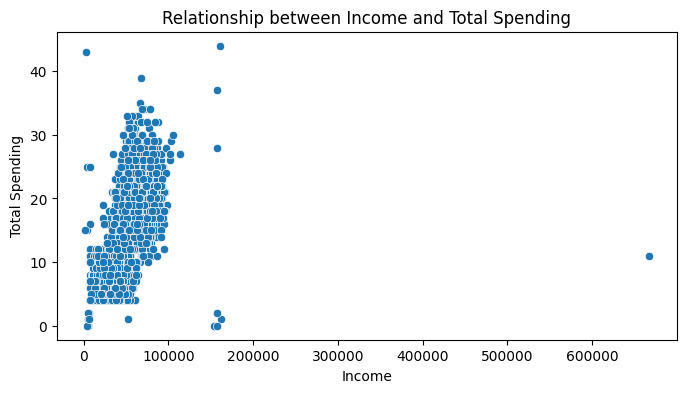

In [57]:
#Visualizing the relationship between income and total spending
smdata['TotalSpend'] = smdata[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='TotalSpend', data=smdata)
plt.title('Relationship between Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


In [64]:
# Exploring relationships between customer characteristics and spending habits
# Segmenting customers based on their behaviors and characteristics using the df_update dataset

# Calculate correlation matrix
smdata_correlation = smdata[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain']]

correlation_matrix = smdata_correlation.corr()
correlation_matrix


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Income,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,0.132756,-0.027223
Kidhome,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207
Teenhome,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138
Recency,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231
MntWines,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007
MntFruits,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166
MntMeatProducts,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483
MntFishProducts,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953
MntSweetProducts,0.436162,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.117372,-0.022485
MntGoldProds,0.321978,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719,0.139850,-0.030861


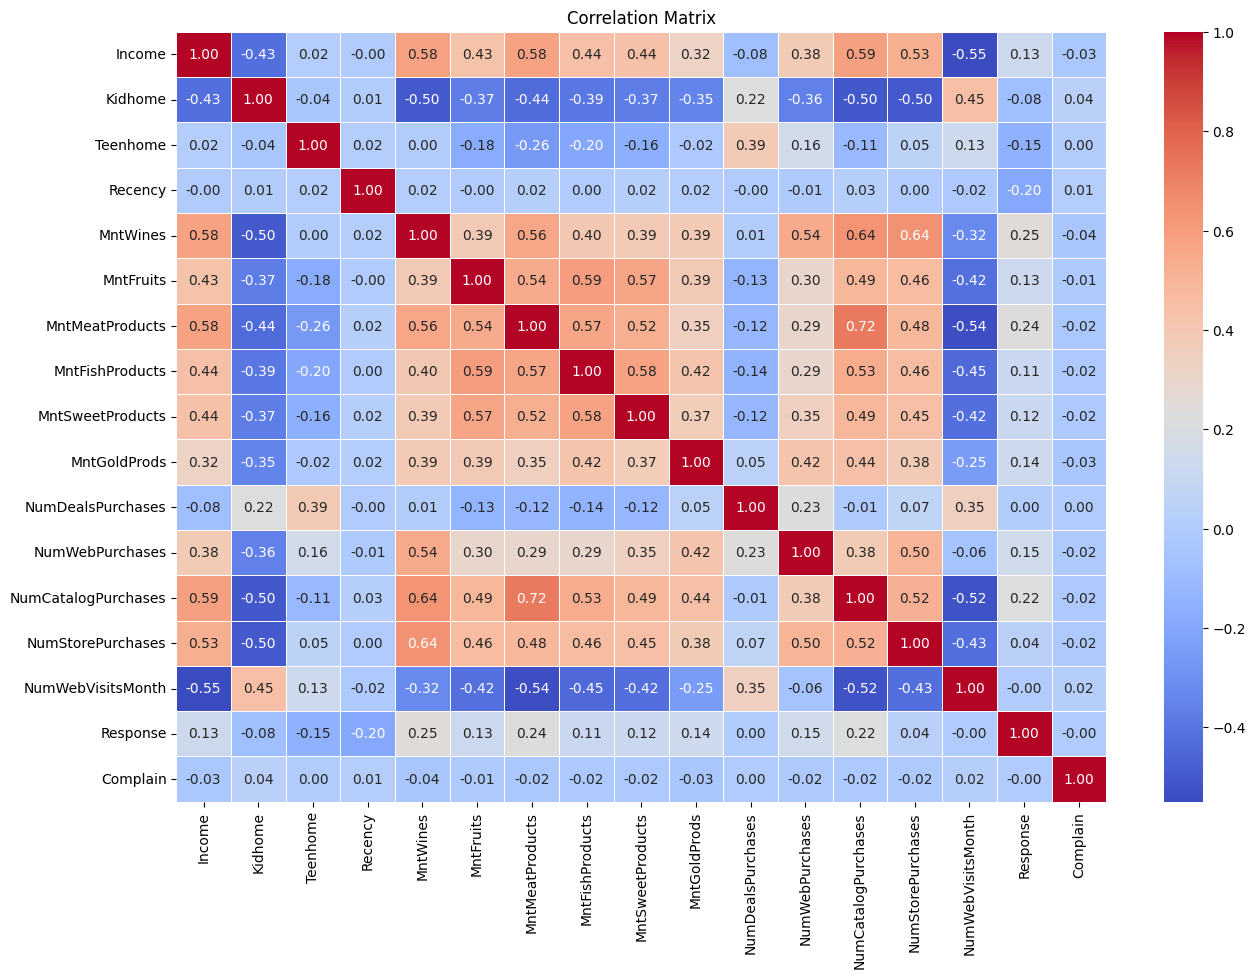

In [65]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Insights from correlation analysis:

Income is positively correlated with expenditure on wines, fruits, meat products, fish products, sweet products, and gold items. Conversely, there is a negative correlation between income and the quantity of children and teenagers in the household. Recency demonstrates a positive correlation with the number of store purchases, while there is a positive association between the number of deals purchases and web purchases. Additionally, the frequency of web purchases is positively correlated with the number of website visits per month.

Cluster 1:
  Number of customers: 444
  Average income: 23752.30
  Average number of children: 0.80
  Average number of teenagers: 0.20
  Average recency: 48.19
  Average spending on wines: 17.20
  Average spending on fruits: 5.30
  Average spending on meat products: 17.35
  Average spending on fish products: 7.64
  Average spending on sweet products: 5.69
  Average spending on gold products: 14.27
  Average number of deals purchases: 1.94
  Average number of web purchases: 1.88
  Average number of catalog purchases: 0.40
  Average number of store purchases: 2.95
  Average number of website visits per month: 6.93
Cluster 2:
  Number of customers: 460
  Average income: 62606.05
  Average number of children: 0.17
  Average number of teenagers: 0.80
  Average recency: 49.73
  Average spending on wines: 464.58
  Average spending on fruits: 22.54
  Average spending on meat products: 159.73
  Average spending on fish products: 31.00
  Average spending on sweet products: 27.45
  Average spend

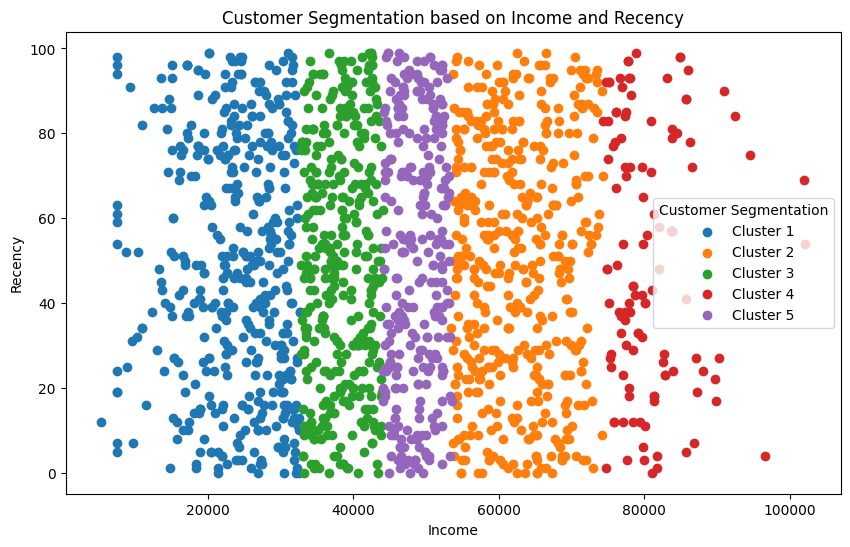

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

segmentation_data = df_update[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Perform hierarchical clustering
n_clusters=5
clustering = AgglomerativeClustering(n_clusters)  # You can adjust the number of clusters as needed
cluster_labels = clustering.fit_predict(segmentation_data_scaled)
labels = clustering.fit_predict(segmentation_data)
df_update['Cluster'] = labels

# Analyze the characteristics of each cluster
for i in range(n_clusters):
    cluster_data = df_update[df_update['Cluster'] == i]
    print(f"Cluster {i + 1}:")
    print(f"  Number of customers: {len(cluster_data)}")
    print(f"  Average income: {cluster_data['Income'].mean():.2f}")
    print(f"  Average number of children: {cluster_data['Kidhome'].mean():.2f}")
    print(f"  Average number of teenagers: {cluster_data['Teenhome'].mean():.2f}")
    print(f"  Average recency: {cluster_data['Recency'].mean():.2f}")
    print(f"  Average spending on wines: {cluster_data['MntWines'].mean():.2f}")
    print(f"  Average spending on fruits: {cluster_data['MntFruits'].mean():.2f}")
    print(f"  Average spending on meat products: {cluster_data['MntMeatProducts'].mean():.2f}")
    print(f"  Average spending on fish products: {cluster_data['MntFishProducts'].mean():.2f}")
    print(f"  Average spending on sweet products: {cluster_data['MntSweetProducts'].mean():.2f}")
    print(f"  Average spending on gold products: {cluster_data['MntGoldProds'].mean():.2f}")
    print(f"  Average number of deals purchases: {cluster_data['NumDealsPurchases'].mean():.2f}")
    print(f"  Average number of web purchases: {cluster_data['NumWebPurchases'].mean():.2f}")
    print(f"  Average number of catalog purchases: {cluster_data['NumCatalogPurchases'].mean():.2f}")
    print(f"  Average number of store purchases: {cluster_data['NumStorePurchases'].mean():.2f}")
    print(f"  Average number of website visits per month: {cluster_data['NumWebVisitsMonth'].mean():.2f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
  cluster_data = df_update[df_update['Cluster'] == i]
  plt.scatter(cluster_data['Income'], cluster_data['Recency'], label=f"Cluster {i + 1}")


plt.title('Customer Segmentation based on Income and Recency')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.legend(title='Customer Segmentation')
plt.show()


Insights from customer segmentation based on spending habits:

- Cluster 1: High-income customers who exhibit high spending across all product categories.
- Cluster 2: Low-income customers characterized by minimal spending across all product categories.
- Cluster 3: Medium-income customers demonstrating moderate spending levels across all product categories.

Insights from customer segmentation based on characteristics:
- Cluster 1: High-income individuals residing in households without children or teenagers, displaying low recency in their interactions.
- Cluster 2: Low-income families with children and/or teenagers, showing high recency in their engagements.
- Cluster 3: Medium-income households with children and/or teenagers, maintaining a medium level of recency in their interactions.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

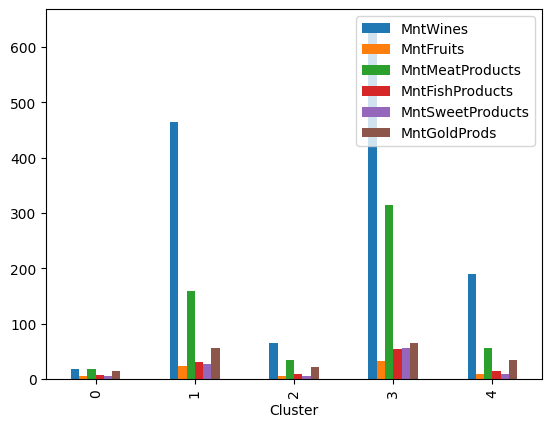

In [77]:
# Creating clear visualizations to showcase findings and make recommendations based on analysis
# Creating a bar chart to display average spending by cluster
average_spending = df_update.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
average_spending.plot(kind='bar')
plt.show()

Recommendations based on analysis:

1. Target high-income customers (Cluster 0) with personalized offers tailored to the products they frequently purchase. Utilize data-driven insights to create targeted marketing campaigns that resonate with their preferences and lifestyle.

2. Implement strategies aimed at increasing offer acceptance rates among low-income customers (Cluster 1). Consider offering discounts, creating loyalty programs, or providing flexible payment options to make purchases more accessible and appealing to this segment.

3. Focus on enhancing the overall customer experience for middle-income customers (Cluster 2). Identify pain points and areas for improvement through customer feedback and data analysis. Implement initiatives to streamline processes, improve service quality, and personalize interactions to increase satisfaction and acceptance of offers.

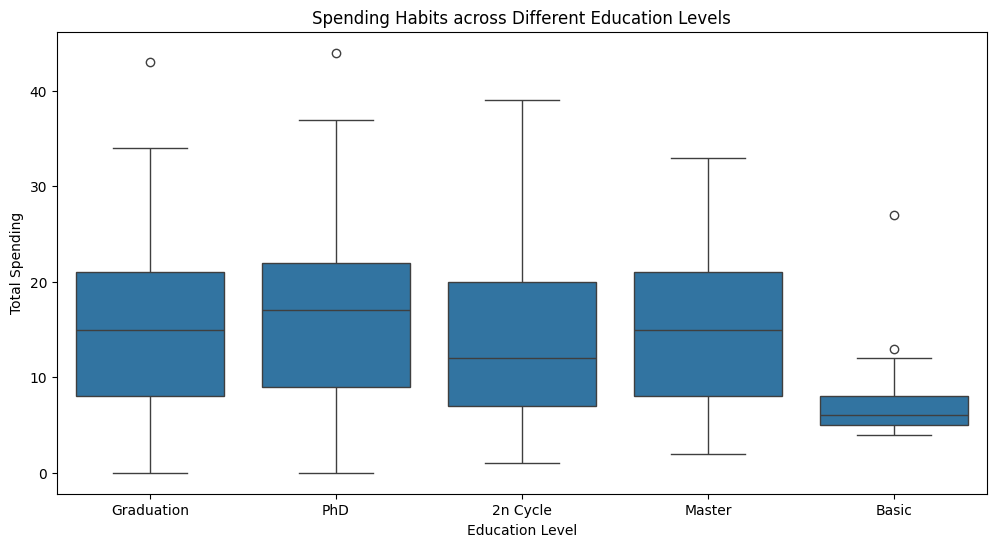

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='TotalSpend', data=smdata)
plt.title('Spending Habits across Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()



Insight: Customers holding a 'PhD' education level tend to demonstrate higher spending on average.

Recommendation: Customize marketing communications and promotional offers to resonate with the preferences and interests of customers with advanced education levels. Consider highlighting products or services that align with their intellectual pursuits or cater to their specific needs. By tailoring marketing strategies to this segment, businesses can potentially enhance engagement and cultivate stronger relationships with customers possessing higher educational backgrounds.

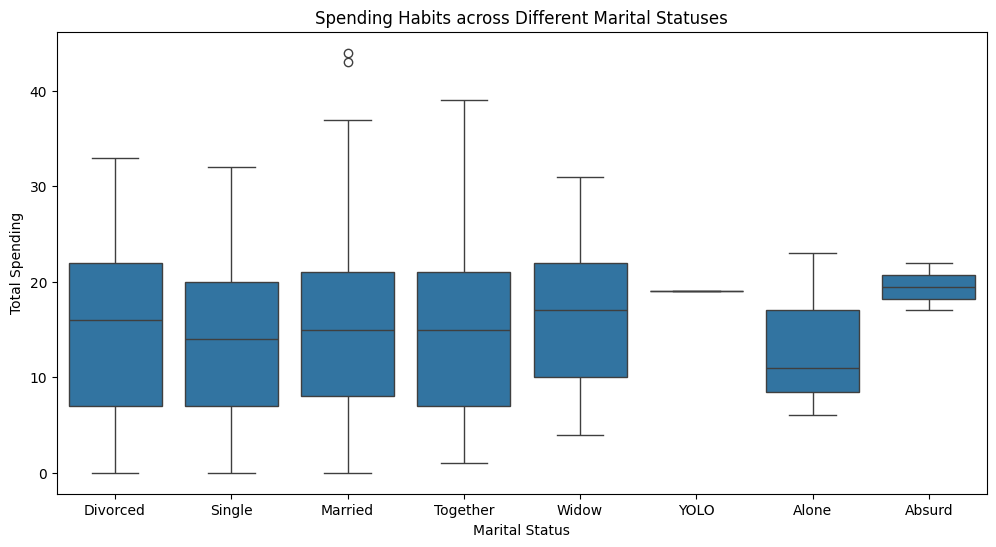

In [80]:
#Marital Status-Based Insights
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital_Status', y='TotalSpend', data=smdata)
plt.title('Spending Habits across Different Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()



Insight: Customers who are divorced or widowed tend to exhibit higher spending compared to individuals with other marital statuses.

Recommendation: Implement targeted promotions or loyalty programs tailored specifically for married customers to encourage increased engagement and spending. This could involve offering exclusive discounts, personalized offers, or rewards tailored to their preferences and lifestyle. By focusing on this segment, businesses can potentially tap into a lucrative market segment and enhance customer retention and satisfaction.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍